## Aula 04b - Transformada Discreta de Fourier 1D

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [5]:
def DFT1D(A):
    
    F = np.zeros(A.shape, dtype=np.complex64)
    n = A.shape[0]

    start = time.time()
    
    # for each frequency
    for u in np.arange(n):
        # for each element
        for x in range(n):
            F[u] += A[x]*np.exp( (-1j * 2 * np.pi * u*x) / n )
            
    end = time.time()
    elapsed1 = end - start

    print("Running time: " + str(elapsed1) + "sec.")
    
    return F

(2000,)

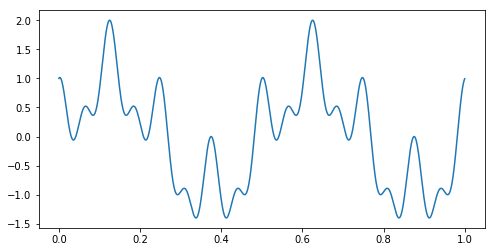

In [3]:
t = np.arange(0, 1, 0.0005)
f = 1*np.sin(t*(2*np.pi) * 2) + 0.6*np.cos(t*(2*np.pi) * 8) + 0.4*np.cos(t*(2*np.pi) * 16)

plt.figure(figsize=(8,4)) 
plt.plot(t,f)
t.shape


Running time: 25.829384803771973sec.


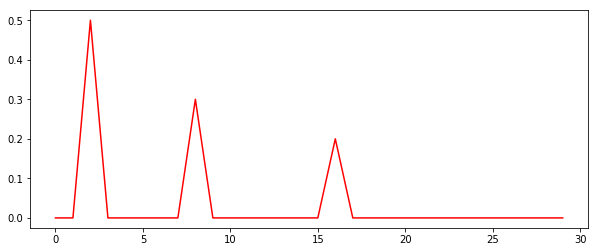

In [4]:
F = DFT1D(f)
limit = 30
fq = np.arange(limit)
plt.figure(figsize=(10,4)) 
plt.plot(fq, abs(F[0:limit]), 'r')

In [6]:
# vamos reimplementar a funcao agora mais otimizada
def DFT1D(A):
    
    F = np.zeros(A.shape, dtype=np.complex64)
    n = A.shape[0]

    start = time.time()
    # criamos os indices para x
    x = np.arange(n)
    # para cada frequencia, computamos de forma vetorial para x e somamos em 'u'
    for u in np.arange(n):
        F[u] = np.sum(A*np.exp( (-1j * 2 * np.pi * u*x) / n ))
        
    end = time.time()
    elapsed = end - start
    
    print("Vector size: " + str(n))
    print("Running time: " + str(elapsed) + " sec.")
    
    return F


Vector size: 2000
Running time: 0.21861791610717773 sec.


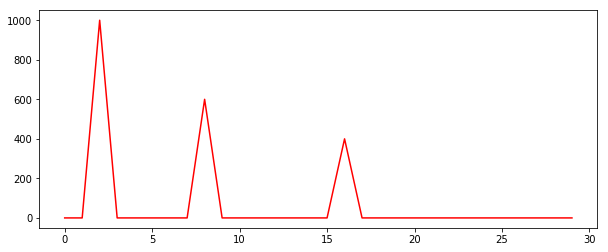

In [7]:
F = DFT1D(f)
limit = 30
fq = np.arange(limit)
plt.figure(figsize=(10,4)) 
plt.plot(fq, abs(F[0:limit]), 'r')


### Aplicando análise de frequência em imagens
Vamos considerar que cada imagem é um vetor unidimensional, formado pela concatenação de suas linhas. 
Para isso iremos re-formatar as imagens e executar a transformada.

Note, no entanto, que a DFT possui complexidade quadrática. Ou seja, dado um número de pixels $N$, ela executa em $O(N^2)$, o que pode ser impeditivo. Por exemplo uma imagem de 1 Megapixel (~1 milhão de pixels), executaria o seguinte número de operações (nesse caso cada operação é o produto de um elemento por uma exponencial complexa):

$N^2 = 1.000.000^2 = 10^{12}$

Se cada operação levar 0.1 millisegundo, então a DFT dessa imagem levaria, em horas, aproximadamente
$(10^{12}/1000))/60)/60 \approx 277.778$

277 horas para processar. Por isso abaixo iremos usar apenas trechos das imagens.

Existe um algoritmo capaz de processar a Transformada de Fourier em tempo mais reduzido, com complexidade $O(n \log n)$. Esse algoritmo é conhecido como Fast Fourier Transform. Por enquanto vamos usar nossa implementação que, apesar de simples, nos permite entender completamente o funcionamento da transformada.

(-0.5, 511.5, 511.5, -0.5)

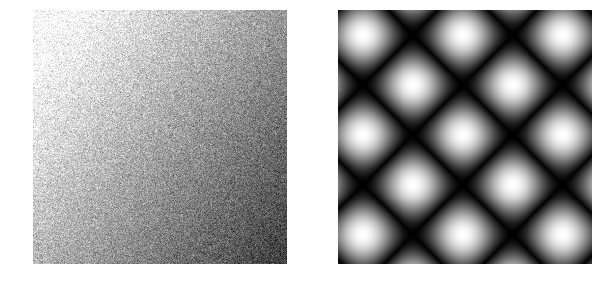

In [12]:
#carregando imagens
img1 = imageio.imread("imagens/gradient_noise.png")
img2 = imageio.imread("imagens/sin1.png")
plt.figure(figsize=(10,8)) 
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2, cmap="gray")
plt.axis('off')

In [13]:
# extraindo uma amostra, com 1024 elementos de cada imagem
start = 10000
total = 1024

vet1 = img1.reshape([img1.shape[0] * img1.shape[1]])
vet1 = vet1[start:start+total]

vet2 = img2.reshape([img2.shape[0] * img2.shape[1]])
vet2 = vet2[start:start+total]

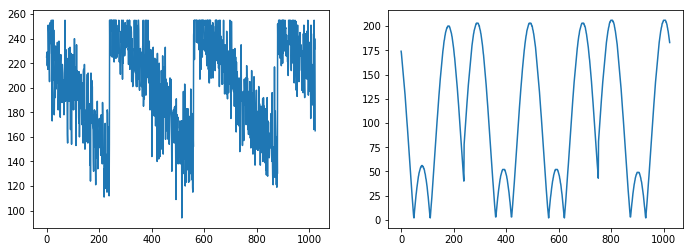

In [14]:
plt.figure(figsize=(18,4)) 
plt.subplot(131)
plt.plot(vet1)
plt.subplot(132)
plt.plot(vet2)

In [15]:
F1 = DFT1D(vet1)
F2 = DFT1D(vet2)

Vector size: 1024
Running time: 0.07566452026367188 sec.
Vector size: 1024
Running time: 0.07075881958007812 sec.


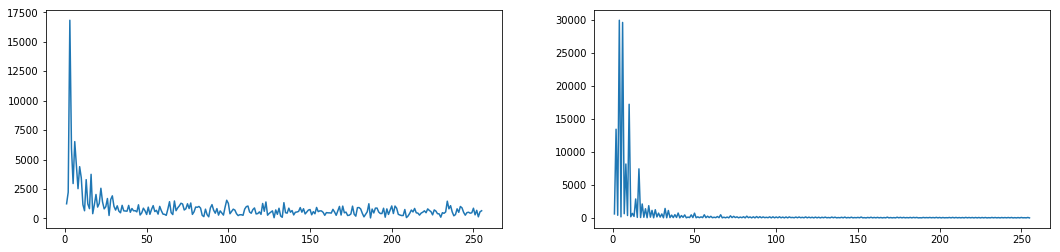

In [16]:
limit = int(vet1.shape[0]/4)
fq = np.arange(1,limit)

plt.figure(figsize=(18,4)) 
plt.subplot(121)
plt.plot(fq, np.abs(F1[1:limit]))
plt.subplot(122)
plt.plot(fq, np.abs(F2[1:limit]))

##### Visualizando as frequências, é possível notar que a interpretação de sinais/imagens reais é mais difícil. Porém se atentarmos para as amplitudes, e a distribuição das frequências, é possível obter informações relevantes.

Por exemplo, note que a imagem 2 não tem magnitudes relevantes após a frequência 50Hz, enquanto a imagem 2 possui suas frequências mais espalhadas, possuindo até mesmo próximo a 500Hz.

Podemos também exibir o logaritmo das frequências, para visualizar melhor.

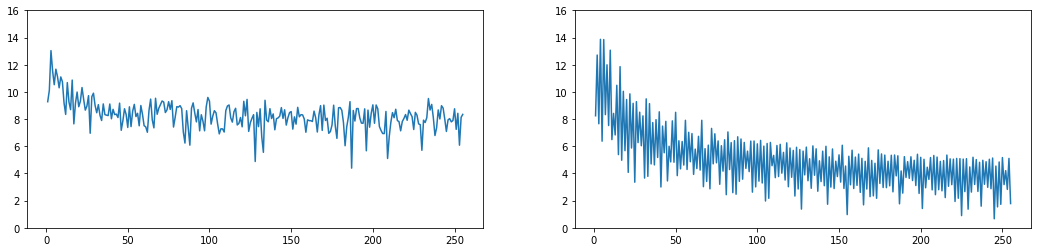

In [17]:
plt.figure(figsize=(18,4)) 
plt.subplot(121)
axes = plt.gca()
axes.set_ylim([0,16])
plt.plot(fq, np.log2(1+ np.abs(F1[1:limit]))-1)
plt.subplot(122)
axes = plt.gca()
axes.set_ylim([0,16])
plt.plot(fq, np.log2(1+ np.abs(F2[1:limit]))-1)

Note como o perfil da imagem 1 (ruidosa) é a presença de uma gama maior de frequências, inclusive altas frequências, enquanto que a imagem 2 é melhor representada pelas primeiras frequências apenas (repare no decaimento rápido após ~50Hz)